**importing libraries**

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.cluster import KMeans

**working with dataset**

In [66]:
import os
print(os.getcwd())


/content


In [67]:
from google.colab import files
uploaded = files.upload()


Saving Mall_Customers.csv to Mall_Customers (2).csv


In [68]:
import pandas as pd
customer_data = pd.read_csv('Mall_Customers.csv')
customer_data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [69]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [70]:
customer_data.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [71]:
x=customer_data.drop(columns=['CustomerID','Genre','Age'],axis=1).values

**visualize the Data points**

In [72]:
print(type(X))
import pandas as pd

# If already loaded, skip this line
customer_data = pd.read_csv('Mall_Customers.csv')


<class 'numpy.ndarray'>


In [73]:
X = customer_data[['Annual Income (k$)', 'Spending Score (1-100)']].values


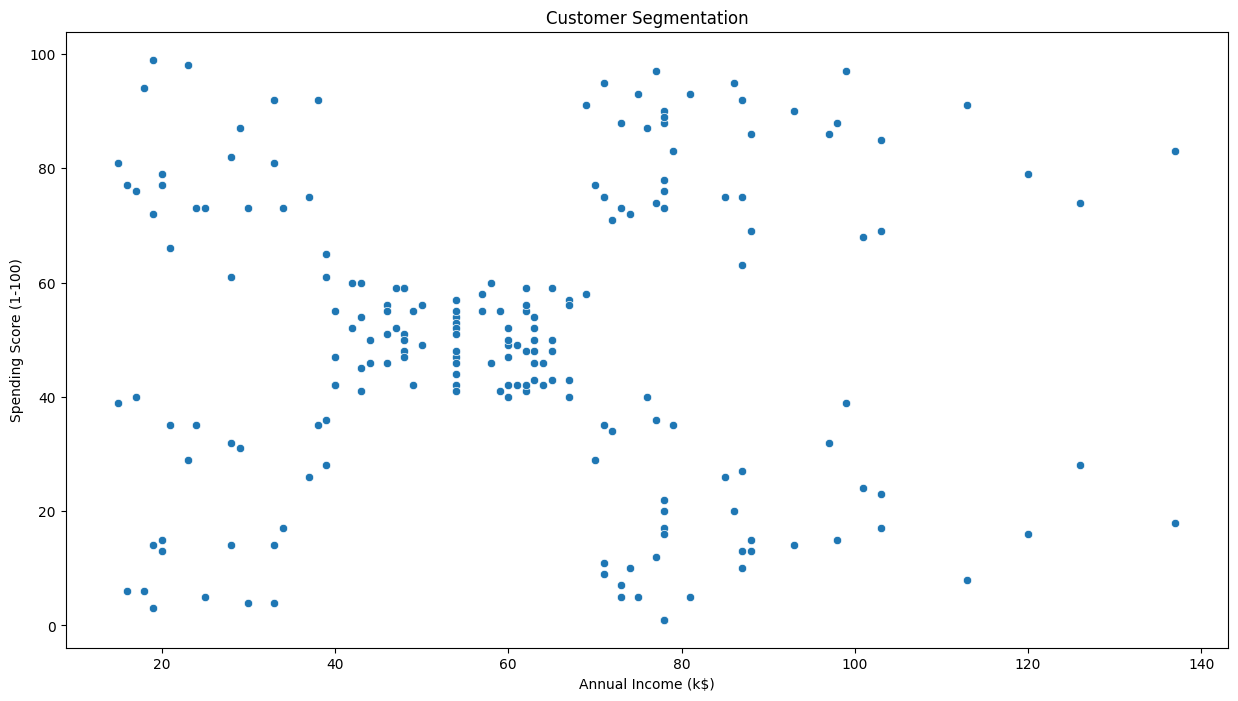

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation')
plt.show()


**find the K Value using the Elbow method**

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


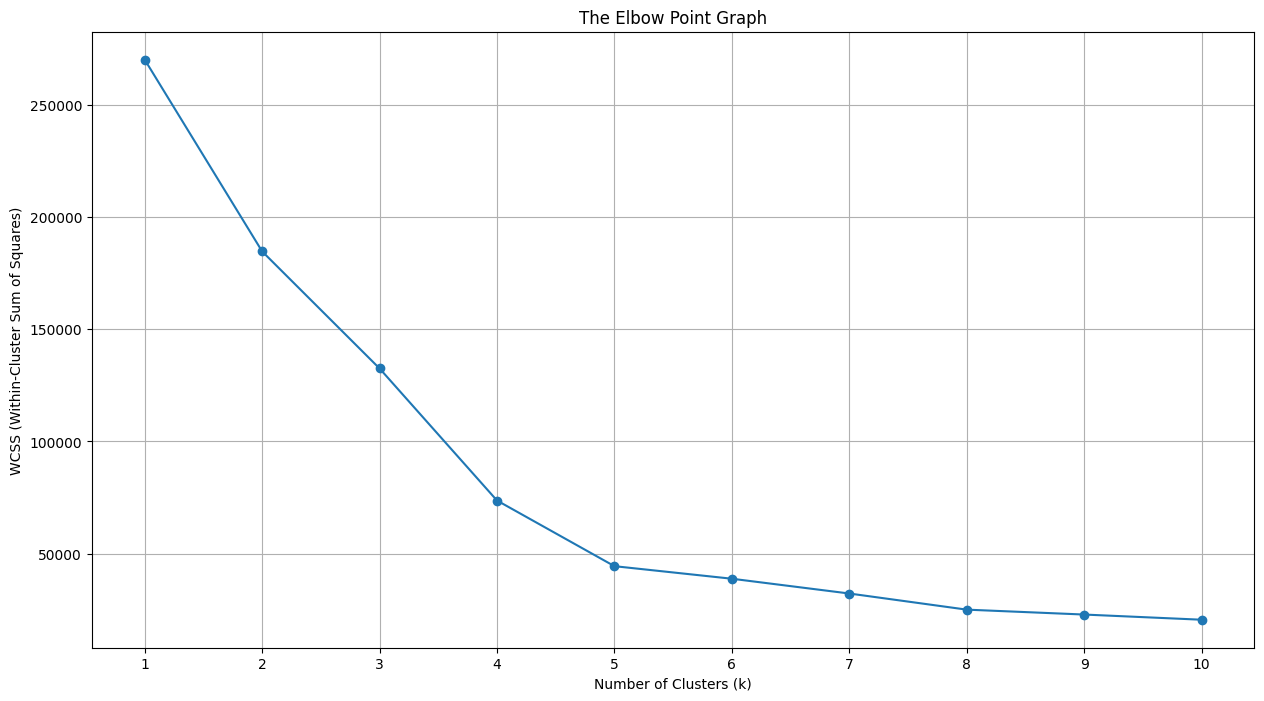

In [76]:
WCSS = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=2)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

plt.figure(figsize=(15, 8))
plt.plot(range(1, 11), WCSS, marker='o')
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


**Training the K-menas algorithm on the training dataset**

In [77]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
Y=kmeans.fit_predict(X)

**Centroid points**

In [78]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

**Visualize the clusters formed**

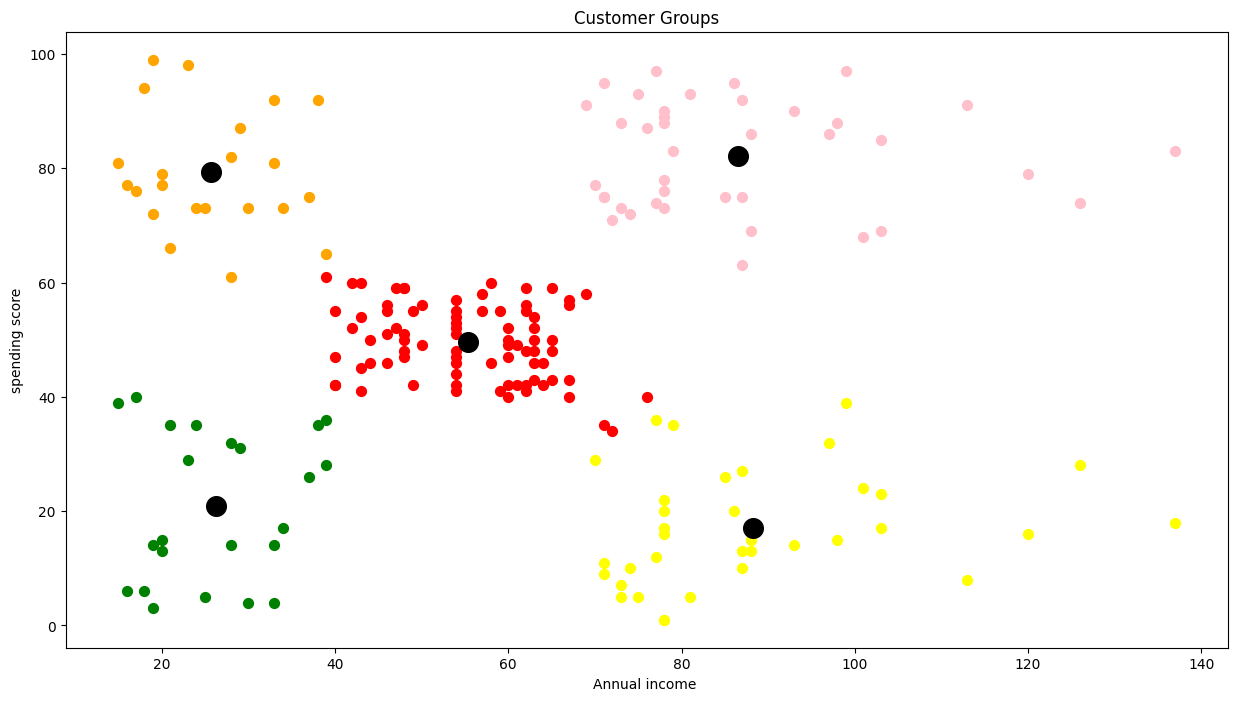

In [79]:
plt.figure(figsize=(15, 8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='red',label='cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='pink',label='cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='yellow',label='cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='green',label='cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='orange',label='cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='black',label='cluster 6')
plt.title('Customer Groups')
plt.xlabel('Annual income ')
plt.ylabel('spending score')
plt.show()





In [80]:
files.download('Mall_Customers.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [83]:
customer_data.to_csv('clustered_data.csv', index=False)
from google.colab import files
files.download('clustered_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

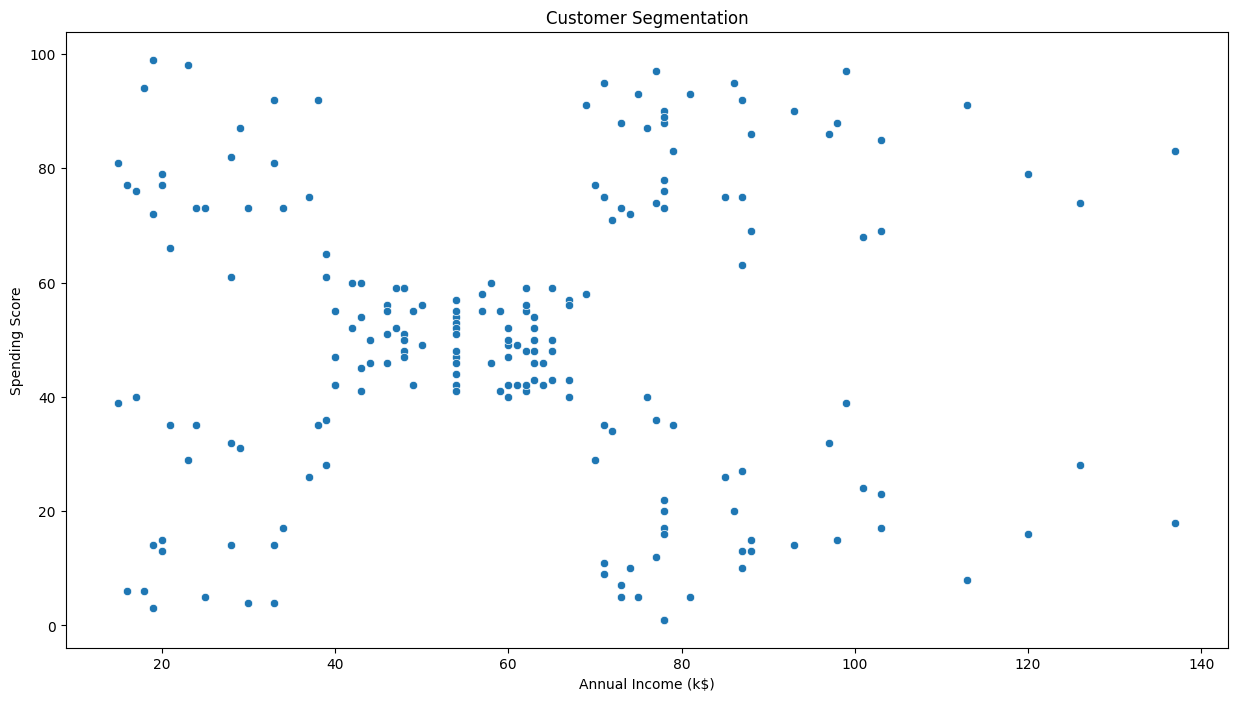

In [84]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation')
plt.savefig('segmentation_plot.png')  # Save the plot
plt.show()


 **Conclusion**